In [10]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from data import resample_nba_data as re
from data import clean_nba_data as cl
from data import clean_and_split_nba_data as clean
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from models import plot_validation_curve as vc
from models import eval_model as evm
from joblib import dump
import joblib
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import silhouette_visualizer
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = pd.read_csv("../data/raw/train.csv")
df

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2996,11794,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,...,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4,1
7996,11679,11795,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,...,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3,1
7997,5537,11796,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,...,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8,1
7998,1292,11797,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,...,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5,1


In [5]:
x_data, x_train, x_val, x_test, y_data , y_train, y_val,  y_test = clean.clean_and_split_nba_data(df)

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', '3P Made', '3PA', 'FTM', 'FTA',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'CALC3P%', 'CALCFG%',
       'CALCFT%'],
      dtype='object')


In [6]:
x=pd.concat([x_data, x_test],ignore_index=True)

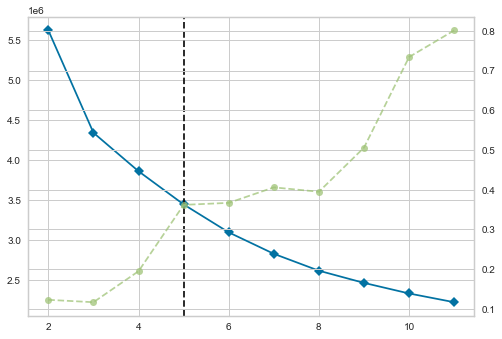

In [7]:
visualizer_train = KElbowVisualizer(KMeans(), k=(2,12), locate_elbow=True).fit(x) 

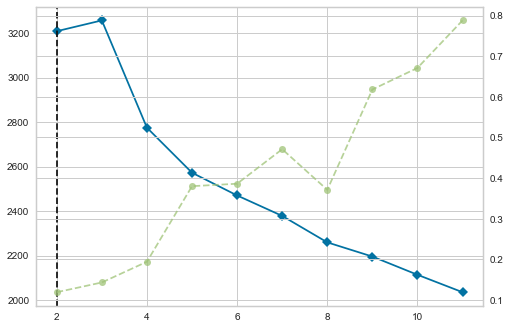

In [8]:
visualizer_train = KElbowVisualizer(KMeans(), k=(2,12), metric='calinski_harabasz' ,locate_elbow=True).fit(x) 

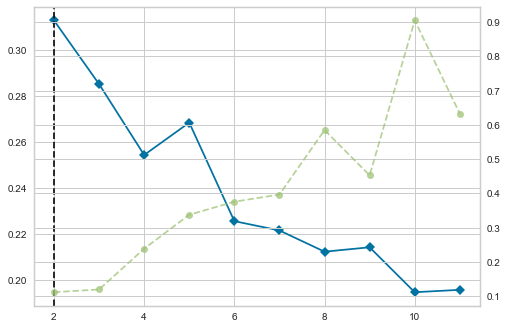

In [9]:
visualizer_train = KElbowVisualizer(KMeans(), k=(2,12), metric='silhouette' ,locate_elbow=True).fit(x) 

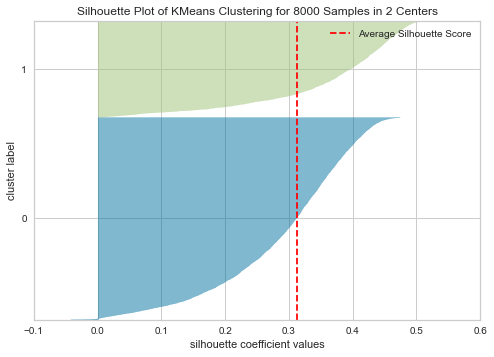

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, random_state=42))

In [11]:
silhouette_visualizer(KMeans(2, random_state=42),x , colors='yellowbrick')

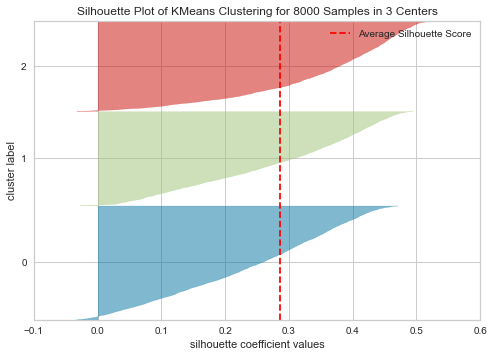

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

In [12]:
silhouette_visualizer(KMeans(3, random_state=42),x , colors='yellowbrick')

In [13]:
gm = GaussianMixture(n_components=2,random_state=8).fit(x)

In [15]:
y_data_pred_gm = gm.predict(x)

In [24]:
y_data_pred_proba_gm = gm.predict_proba(x)

In [18]:
np.unique(y_data_pred_gm,return_counts=True)

(array([0, 1], dtype=int64), array([5651, 2349], dtype=int64))

In [32]:
np.unique(y_data_pred_proba_gm.round(),return_counts=True)

(array([0., 1.]), array([8000, 8000], dtype=int64))

In [21]:
dump(gm,  '../models/sp_wk3_gussian_mixture_model.joblib')

['../models/sp_wk3_gussian_mixture_model.joblib']